In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-all-donors/clean_df1


## Dataframe including all donors (therapeutic donors, AFN, TTD, etc)

#### LOAD DATA

In [3]:
df1 = pd.read_csv('../input/data-all-donors/clean_df1', parse_dates=['date_bled'],dayfirst=True, index_col=[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57666 entries, 0 to 59580
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sample_id       57666 non-null  int64         
 1   donor_code      57666 non-null  object        
 2   ferritin_ratio  57666 non-null  float64       
 3   race            57666 non-null  float64       
 4   group_rh        57666 non-null  object        
 5   age             57666 non-null  float64       
 6   clinic_code     57666 non-null  object        
 7   date_bled       57666 non-null  datetime64[ns]
 8   donations       57666 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 4.4+ MB


In [4]:
# convert datatype
# df2['RACE'] = df2['RACE'].astype(str)

In [5]:
df1.head()

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations
0,11994897,NIEMALJ0030,1168.0,2.0,O POS,63.0,CAN,2022-03-01,13.0
1,12028078,SWARTJN0070,2000.0,1.0,B POS,54.0,CCF,2022-05-27,12.0
2,11994280,FARGHS00010,1572.0,1.0,O POS,58.0,MB4,2022-03-03,19.0
3,12037507,CONRAL00420,2000.0,2.0,A POS,56.0,CCB,2022-06-20,71.0
4,50011361,COLLIS00290,1222.0,4.0,O POS,32.0,NC5,2022-03-04,1.0


In [6]:
# drop specific row (this row messes up following .split function code)
df1 = df1.drop(index = df1[df1['group_rh'] =='A'].index[0])

# define functions to apply to elements in a col in df
def to_gender(x):
    """function to convert race to gender"""
    if x % 2 == 0:
        return 'Female'
    else:
        return 'Male'
      
def to_color(x):
    """function to convert race to color"""
    if x <= 2:        
        return 'white'
    elif x > 2 and x <=4:
        return 'colored'
    elif x > 4 and x<=6:
        return 'other'
    else:
        return 'black'

def to_groups(x):
    """function to convert group_rh to group only"""
    word = x.split(' ')
    return word[0]

def to_rh(x):
    """function to convert group_rh to rh only"""
    word = x.split(' ')
    return word[1]

def to_ferritin_cat(x):
    """function to convert ferritin ratio into defined categories"""
    if x <= 5.9:
        return 'very low'
    elif x > 6 and x <=15.9:
        return 'low'
    elif x >= 16 and x<=500:
        return 'normal'
    elif x >=501 and x <=1000:
        return 'high'
    else:
        return 'very high'

In [7]:
# apply functions to cols in df 
gender = df1['race'].apply(to_gender)
print(gender.value_counts())

color = df1['race'].apply(to_color)
print(color.value_counts())

group = df1['group_rh'].apply(to_groups)
print(group.value_counts())

rh = df1['group_rh'].apply(to_rh)
print(rh.value_counts())

ferritin_cat = df1['ferritin_ratio'].apply(to_ferritin_cat)
print(ferritin_cat.value_counts())

Female    30119
Male      27546
Name: race, dtype: int64
white      35679
colored    18460
black       2892
other        634
Name: race, dtype: int64
O      27165
A      18494
B       8495
AB      2714
A1       610
A2       134
Aw        23
A1B       17
A2B       12
AwB        1
Name: group_rh, dtype: int64
POS    50840
NEG     6755
PDU       70
Name: group_rh, dtype: int64
normal       48202
low           8183
high           677
very low       420
very high      183
Name: ferritin_ratio, dtype: int64


In [8]:
# adds created lists to df as cols
df1['gender'] = gender
df1['color'] = color
df1['group'] = group
df1['rh'] = rh
df1['ferritin_cat'] = ferritin_cat

# convert datatype
# df1['race'] = df1['race'].astype(str)


df1.head(20)

,sample_id,donor_code,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,gender,color,group,rh,ferritin_cat
0,11994897,NIEMALJ0030,1168.0,2.0,O POS,63.0,CAN,2022-03-01,13.0,Female,white,O,POS,very high
1,12028078,SWARTJN0070,2000.0,1.0,B POS,54.0,CCF,2022-05-27,12.0,Male,white,B,POS,very high
2,11994280,FARGHS00010,1572.0,1.0,O POS,58.0,MB4,2022-03-03,19.0,Male,white,O,POS,very high
3,12037507,CONRAL00420,2000.0,2.0,A POS,56.0,CCB,2022-06-20,71.0,Female,white,A,POS,very high
4,50011361,COLLIS00290,1222.0,4.0,O POS,32.0,NC5,2022-03-04,1.0,Female,colored,O,POS,very high
5,12011365,SMITHE00270,1263.0,1.0,O POS,36.0,EAV,2022-06-01,16.0,Male,white,O,POS,very high
6,11936157,MYBUREF0010,1174.0,1.0,O POS,45.0,CAL,2022-03-02,3.0,Male,white,O,POS,very high
7,11997920,WIGGIM00030,1249.0,1.0,B POS,44.0,BAJ,2022-05-17,6.0,Male,white,B,POS,very high
8,11997180,JUSTUJS0020,1294.0,1.0,A POS,59.0,NC1,2022-03-14,3.0,Male,white,A,POS,very high
10,11994372,HAYESPP0010,1148.0,1.0,O POS,66.0,MB1,2022-02-28,10.0,Male,white,O,POS,very high


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57665 entries, 0 to 59580
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sample_id       57665 non-null  int64         
 1   donor_code      57665 non-null  object        
 2   ferritin_ratio  57665 non-null  float64       
 3   race            57665 non-null  float64       
 4   group_rh        57665 non-null  object        
 5   age             57665 non-null  float64       
 6   clinic_code     57665 non-null  object        
 7   date_bled       57665 non-null  datetime64[ns]
 8   donations       57665 non-null  float64       
 9   gender          57665 non-null  object        
 10  color           57665 non-null  object        
 11  group           57665 non-null  object        
 12  rh              57665 non-null  object        
 13  ferritin_cat    57665 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)


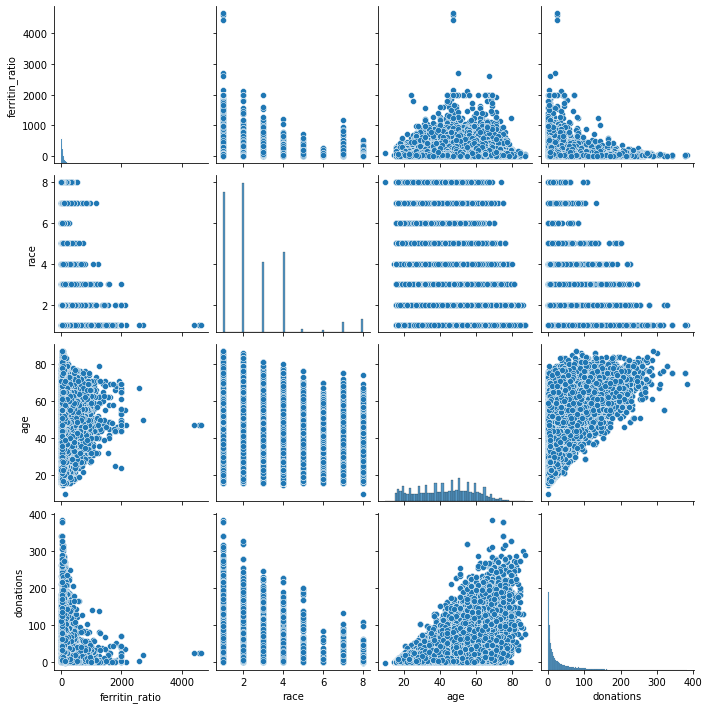

In [10]:
corr_df = df1.drop('sample_id', axis=1)
sns.pairplot(corr_df)

,ferritin_ratio,race,age,donations
ferritin_ratio,1.000000,-0.127318,0.086612,-0.111314
race,-0.127318,1.000000,-0.233241,-0.240183
age,0.086612,-0.233241,1.000000,0.522338
donations,-0.111314,-0.240183,0.522338,1.000000


<AxesSubplot:>

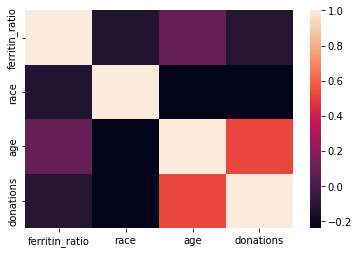

In [11]:
display(corr_df.corr())
sns.heatmap(corr_df.corr())

In [12]:
# correlating categorical variables

# https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/

In [13]:
# install library in jupyter notebook
!pip install dython

In [14]:
from dython.nominal import associations

In [15]:
df_cat_corr = corr_df = df1.drop(['sample_id', 'donor_code'], axis=1)

In [16]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df_cat_corr)
categorical_features

['group_rh', 'clinic_code', 'gender', 'color', 'group', 'rh', 'ferritin_cat']

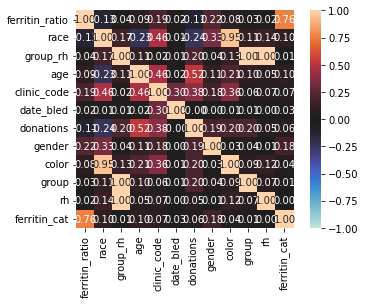

{'corr':                 ferritin_ratio      race  group_rh       age  clinic_code  \
 ferritin_ratio        1.000000 -0.127318  0.037701  0.086612     0.187553   
 race                 -0.127318  1.000000  0.172296 -0.233241     0.462180   
 group_rh              0.037701  0.172296  1.000000  0.112686     0.024914   
 age                   0.086612 -0.233241  0.112686  1.000000     0.462312   
 clinic_code           0.187553  0.462180  0.024914  0.462312     1.000000   
 date_bled             0.024164  0.008811  0.014228  0.022421     0.299313   
 donations            -0.111314 -0.240183  0.203886  0.522338     0.381049   
 gender                0.220666  0.330949  0.044658  0.111264     0.177535   
 color                 0.079177  0.950326  0.131629  0.212827     0.359412   
 group                 0.025684  0.112325  0.999879  0.101882     0.060344   
 rh                    0.017479  0.135212  0.999818  0.051624     0.069299   
 ferritin_cat          0.757969  0.098461  0.006258  0.0

In [17]:
# It calculates the correlation/strength-of-association of features in the data-set with both categorical and continuous features using: Pearson’s R for continuous-continuous cases, Correlation Ratio for categorical-continuous cases, Cramer’s V or Theil’s U for categorical-categorical cases.

associations(df_cat_corr, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', cramers_v_bias_correction=True, num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

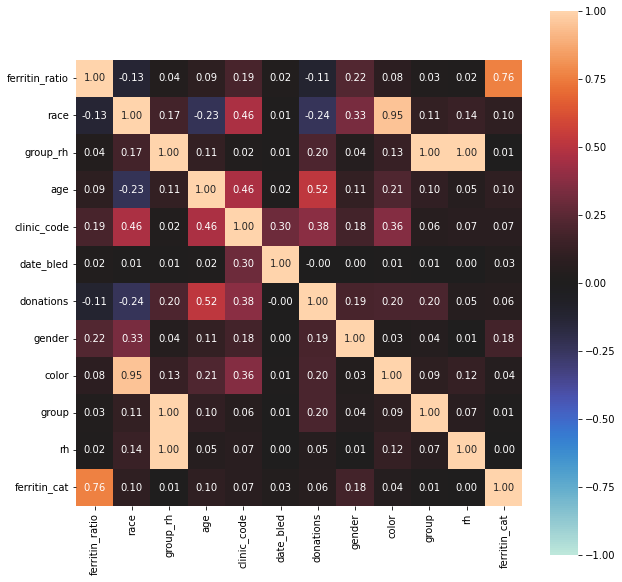

In [18]:
# find the correlation matrix for the whole dataset.
complete_correlation= associations(df_cat_corr, filename= 'complete_correlation.png', figsize=(10,10))

In [19]:
# extract the correlation matrix by using the below code.
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,ferritin_ratio,race,group_rh,age,clinic_code,date_bled,donations,gender,color,group,rh,ferritin_cat
ferritin_ratio,1.00,-0.13,0.04,0.09,0.19,0.02,-0.11,0.22,0.08,0.03,0.02,0.76
race,-0.13,1.00,0.17,-0.23,0.46,0.01,-0.24,0.33,0.95,0.11,0.14,0.10
group_rh,0.04,0.17,1.00,0.11,0.02,0.01,0.20,0.04,0.13,1.00,1.00,0.01
age,0.09,-0.23,0.11,1.00,0.46,0.02,0.52,0.11,0.21,0.10,0.05,0.10
clinic_code,0.19,0.46,0.02,0.46,1.00,0.30,0.38,0.18,0.36,0.06,0.07,0.07
date_bled,0.02,0.01,0.01,0.02,0.30,1.00,-0.00,0.00,0.01,0.01,0.00,0.03
donations,-0.11,-0.24,0.20,0.52,0.38,-0.00,1.00,0.19,0.20,0.20,0.05,0.06
gender,0.22,0.33,0.04,0.11,0.18,0.00,0.19,1.00,0.03,0.04,0.01,0.18
color,0.08,0.95,0.13,0.21,0.36,0.01,0.20,0.03,1.00,0.09,0.12,0.04
group,0.03,0.11,1.00,0.10,0.06,0.01,0.20,0.04,0.09,1.00,0.07,0.01


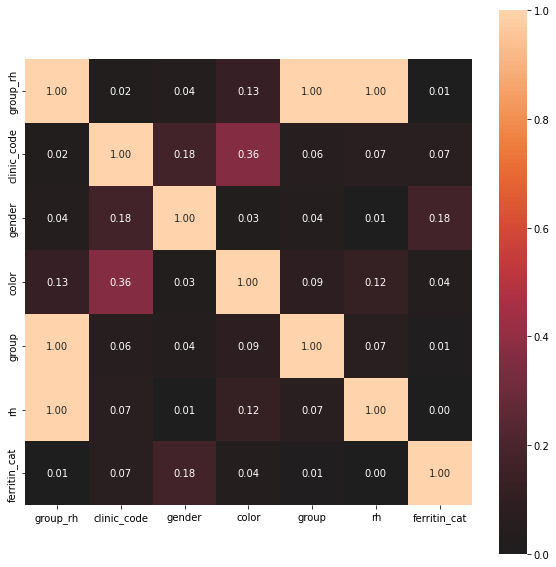

In [20]:
# generate the correlation matrix for only categorical variables
selected_column= df_cat_corr[categorical_features]
categorical_df = selected_column.copy()

categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

In [21]:
# convert datatype
df1['race'] = df1['race'].astype(str)

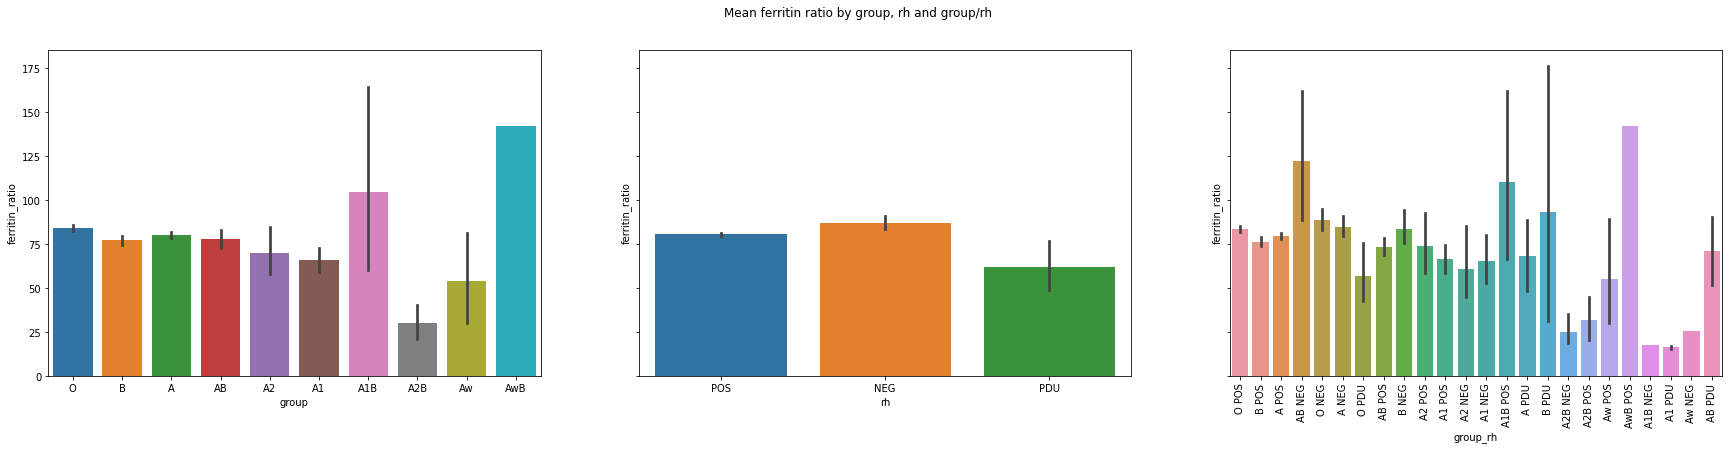

In [22]:
fig, axes = plt.subplots(1,3, figsize=(30, 6), sharey=True)
fig.suptitle('Mean ferritin ratio by group, rh and group/rh')

sns.barplot(x='group', y='ferritin_ratio',data=df1, ax=axes[0])

sns.barplot(x='rh', y='ferritin_ratio',data=df1, ax=axes[1])

sns.barplot(x='group_rh', y='ferritin_ratio',data=df1, ax=axes[2])
plt.xticks(rotation=90)

plt.show()

<AxesSubplot:xlabel='color', ylabel='ferritin_ratio'>

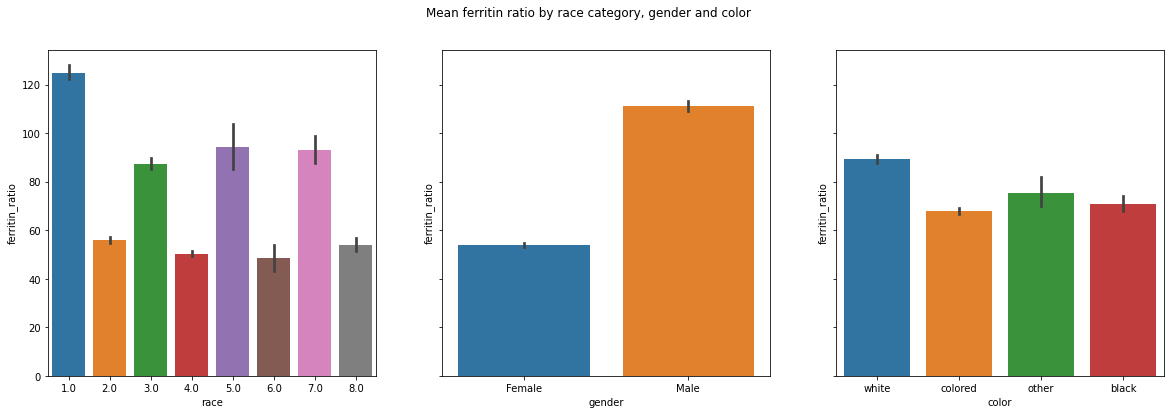

In [23]:
fig, axes = plt.subplots(1,3, figsize=(20, 6), sharey=True)
fig.suptitle('Mean ferritin ratio by race category, gender and color')

sns.barplot(x='race', y='ferritin_ratio',data=df1, ax=axes[0], order=['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'])

sns.barplot(x='gender', y='ferritin_ratio',data=df1, ax=axes[1])

sns.barplot(x='color', y='ferritin_ratio',data=df1, ax=axes[2], order=['white', 'colored', 'other', 'black'])


<AxesSubplot:xlabel='ferritin_cat', ylabel='ferritin_ratio'>

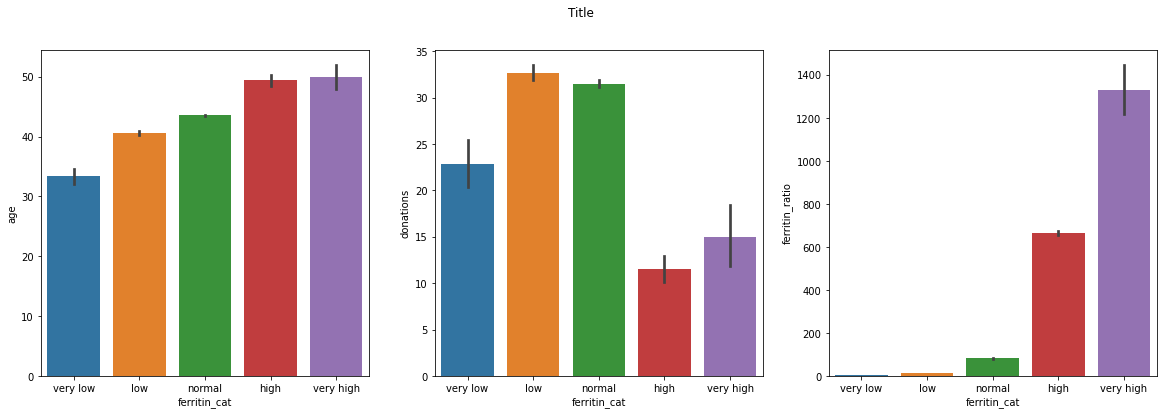

In [24]:
fig, axes = plt.subplots(1,3, figsize=(20, 6), sharey=False)
fig.suptitle('Title')

sns.barplot(x='ferritin_cat', y='age',data=df1, ax=axes[0], order=['very low', 'low', 'normal', 'high', 'very high'])

sns.barplot(x='ferritin_cat', y='donations',data=df1, ax=axes[1], order=['very low', 'low', 'normal', 'high', 'very high'])

sns.barplot(x='ferritin_cat', y='ferritin_ratio',data=df1, ax=axes[2], order=['very low', 'low', 'normal', 'high', 'very high'])


<AxesSubplot:>

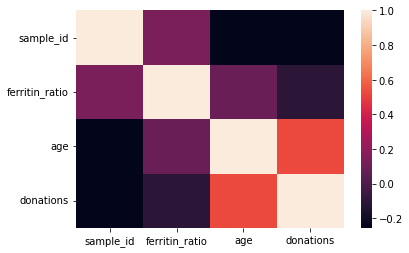

In [25]:
sns.heatmap(df1.corr())

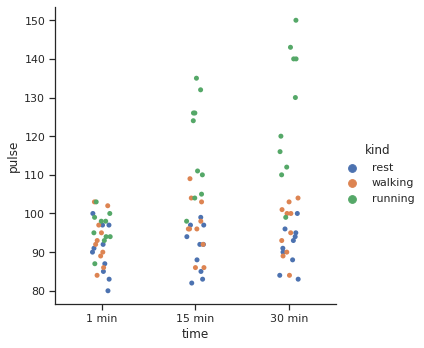

In [26]:

sns.set_theme(style="ticks")
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

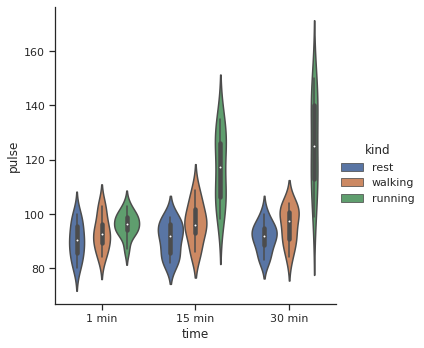

In [27]:
g = sns.catplot(x="time", y="pulse", hue="kind",data=exercise, kind="violin")

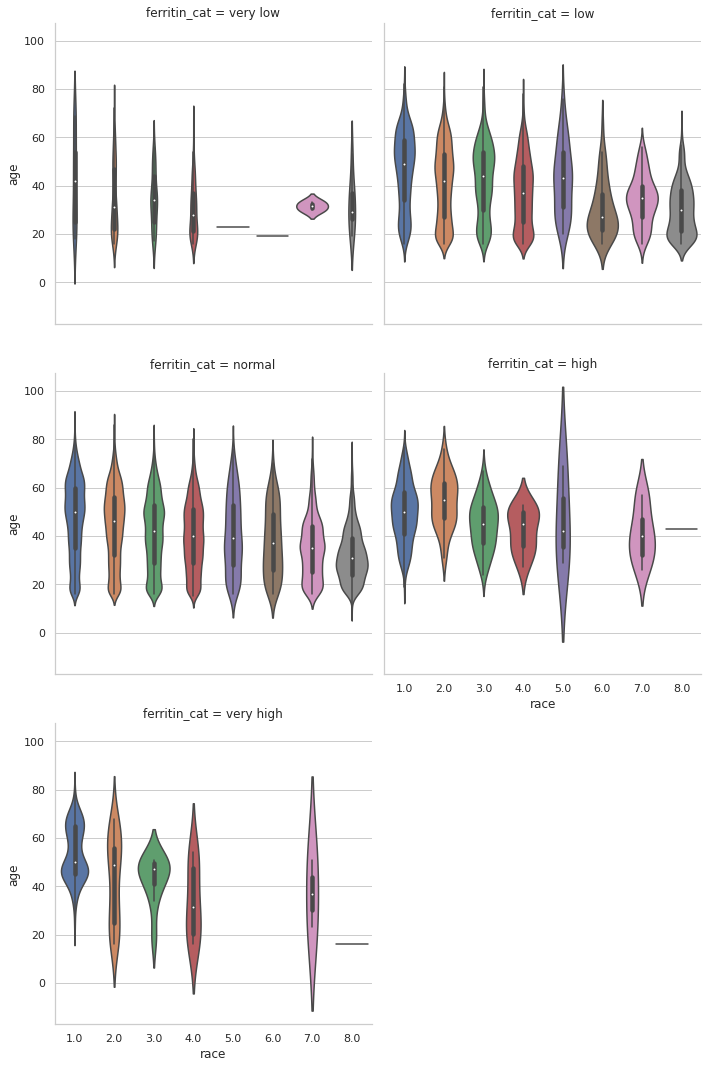

In [37]:
sns.set_style('whitegrid')

g = sns.catplot(x="race", y="age", col='ferritin_cat', col_wrap=2,data=df1, kind='violin', col_order=['very low', 'low', 'normal', 'high', 'very high'], order=['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0'])

In [ ]:
g = sns.catplot(x="time", y="pulse", hue="kind",col="diet", data=exercise,height=5, aspect=.8)

In [ ]:
titanic = sns.load_dataset("titanic")
g = sns.catplot(x="alive", col="deck", col_wrap=4,data=titanic[titanic.deck.notnull()],kind="count", height=2.5, aspect=.8)

In [ ]:
g = sns.catplot(x="age", y="embark_town",hue="sex", row="class",data=titanic[titanic.embark_town.notnull()],orient="h", height=2, aspect=3, palette="Set3",kind="violin", dodge=True, cut=0, bw=.2)

In [ ]:
g = sns.catplot(x="who", y="survived", col="class",data=titanic, saturation=.5,kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate").set_xticklabels(["Men", "Women", "Children"]).set_titles("{col_name} {col_var}").set(ylim=(0, 1)).despine(left=True))  #doctest: +ELLIPSIS

In [ ]:

Examples
--------

Draw a single facet to use the :class:`FacetGrid` legend placement:

.. plot::
    :context: close-figs

    >>> import seaborn as sns
    >>> sns.set_theme(style="ticks")
    >>> exercise = sns.load_dataset("exercise")
    >>> g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

Use a different plot kind to visualize the same data:

.. plot::
    :context: close-figs

    >>> g = sns.catplot(x="time", y="pulse", hue="kind",
    ...                data=exercise, kind="violin")

Facet along the columns to show a third categorical variable:

.. plot::
    :context: close-figs

    >>> g = sns.catplot(x="time", y="pulse", hue="kind",
    ...                 col="diet", data=exercise)

Use a different height and aspect ratio for the facets:

.. plot::
    :context: close-figs

    >>> g = sns.catplot(x="time", y="pulse", hue="kind",
    ...                 col="diet", data=exercise,
    ...                 height=5, aspect=.8)

Make many column facets and wrap them into the rows of the grid:

.. plot::
    :context: close-figs

    >>> titanic = sns.load_dataset("titanic")
    >>> g = sns.catplot(x="alive", col="deck", col_wrap=4,
    ...                 data=titanic[titanic.deck.notnull()],
    ...                 kind="count", height=2.5, aspect=.8)

Plot horizontally and pass other keyword arguments to the plot function:

.. plot::
    :context: close-figs

    >>> g = sns.catplot(x="age", y="embark_town",
    ...                 hue="sex", row="class",
    ...                 data=titanic[titanic.embark_town.notnull()],
    ...                 orient="h", height=2, aspect=3, palette="Set3",
    ...                 kind="violin", dodge=True, cut=0, bw=.2)

Use methods on the returned :class:`FacetGrid` to tweak the presentation:

.. plot::
    :context: close-figs

    >>> g = sns.catplot(x="who", y="survived", col="class",
    ...                 data=titanic, saturation=.5,
    ...                 kind="bar", ci=None, aspect=.6)
    >>> (g.set_axis_labels("", "Survival Rate")
    ...   .set_xticklabels(["Men", "Women", "Children"])
    ...   .set_titles("{col_name} {col_var}")
    ...   .set(ylim=(0, 1))
    ...   .despine(left=True))  #doctest: +ELLIPSIS